# Wild Type BRAF Protein and V600E Mutant Comparison by ProDy

## Brief Introduction

In this work, we focused on protein HUMAN_BRAF (P15056) and attempt to figure out the influence of V600E mutant for intrinsic dynamics.
By combining sequence conservation analysis, co-evolution information, structural features and dynamics characteristics, our workflow indicated that both intra and inter-domain interactions define the intrinsic dynamics and also link with functional sites.

## Package Preparations

Our project depends on the ProDy package written in Python by Ivet Bahar Lab (https://www.ccbb.pitt.edu/Faculty/bahar/index.html).

Install the package with Terminal by typing: 

        $ pip install prody

Load the ProDy related packages we need:

In [1]:
from prody import *
from pylab import *
ion()

/anaconda3/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be re

Load the plotting related packages for refining plotting outputs:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyses of Wild Type HUMAN_BRAF Protein (PK_Tyr_Ser-Thr Domain)

## Sequence Analysis by Evol

Evol is a suite of powerful and efficient API features and applications for analysis of sequence evolution and its comparison to protein functional dynamics.

### Entropy Calculation

First, we retrieve MSA for protein family PF07714.

In [ ]:
fetchPfamMSA('PF07714')

Then, we parse MSA file and refine for no gap one based on the sequence of BRAF_HUMAN.

In [3]:
# MSA for protein family PK_Tyr_Ser-Thr (PF07714)
msa = parseMSA('Lab2/PF07714_full.sth')
msa


@> 187300 sequence(s) with 3741 residues were parsed in 5.24s.


<MSA: PF07714_full (187300 sequences, 3741 residues)>

MSA was refined as below, reducing number of columns from 3741 to 258 and number of rows from 187300 to 68892.

In [4]:
# Refine MSA output
msa_refined = refineMSA(msa, label = 'BRAF_HUMAN', rowocc = 0.8, seqid = 0.98)
msa_refined


@> Label refinement reduced number of columns from 3741 to 258 in 0.47s.
@> Row occupancy refinement reduced number of rows from 187300 to 128067 in 0.14s.
@> Sequence identity refinement reduced number of rows from 128067 to 68892 in 3932.84s.


<MSA: PF07714_full refined (label=BRAF_HUMAN, rowocc>=0.8, seqid>=0.98) (68892 sequences, 258 residues)>

Before plotting the entropy map, we should parse label start and end values, setting residue numbers to the corresponding region in BRAF protein sequence.

Write a function for getting corresponding residue range for indices:

In [5]:
# Function for Getting Corresponding Residue Range for Indices
def FindResRange(PfamFile, ProteinName):
    with open(PfamFile) as pf:
        lines = pf.readlines()
        temp_index = []

        for item in lines:
            if item.startswith("#=GS " + ProteinName):
                temp_index.append(lines.index(item))

        splited =  lines[temp_index[1]].split(" ")
        ResName_Num = splited[1].split("/")
        ResRange = ResName_Num[1]
        temp = ResRange.split("-")
        start = int(temp[0])
        end = int(temp[1])
        
    return (start, end)


In [6]:
# Get the indices
ResRange = FindResRange("Lab2/PF07714_full.sth", "BRAF_HUMAN")
print(ResRange)

ResStart = ResRange[0]
ResEnd = ResRange[1]

indices = [i for i in range(ResStart, ResEnd + 1)]
print(indices)

(457, 714)
[457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654

Compare refinement effect by checking the occupancy of MSA in each position.

Text(0.5, 1.0, 'Occupancy of Unrefined MSA (PF07714)')

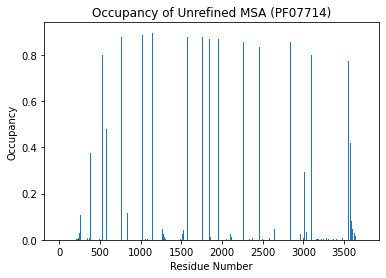

In [8]:
# Occupancy of Unrefined MSA
showMSAOccupancy(msa, occ='res')
plt.xlabel("Residue Number")
plt.title("Occupancy of Unrefined MSA (PF07714)")


Text(0.5, 1.0, 'Occupancy of Refined MSA (PF07714)')

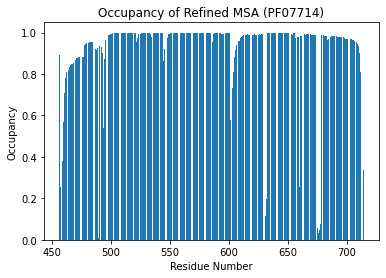

In [9]:
# Occupancy of Refined MSA
showMSAOccupancy(msa_refined, occ='res', indices=indices)
plt.xlabel("Residue Number")
plt.title("Occupancy of Refined MSA (PF07714)")


We calculate [entropy](http://prody.csb.pitt.edu/manual/reference/sequence/analysis.html?highlight=shannonentropy#prody.sequence.analysis.calcShannonEntropy) for refined MSA.

Shannon's entropy measures the degree of uncertainty that exists in a system. In the case of multiple alignments, the Shannon entropy of each protein site can be computed according to: 

$$H(p_1, p_2, \ldots, p_n) = -\sum_{i=1}^n p_i \log_2 p_i $$

where $p_i$ is the frequency of amino acid $i$ in that site. If a column is completely conserved then Shannon entropy is 0. The maximum variability, where each amino acid occurs with frequency 1/20, yields an entropy of 4.32

In [10]:
entropy = calcShannonEntropy(msa_refined)

Plot the entropy variations and label key residue V600 with a red star.

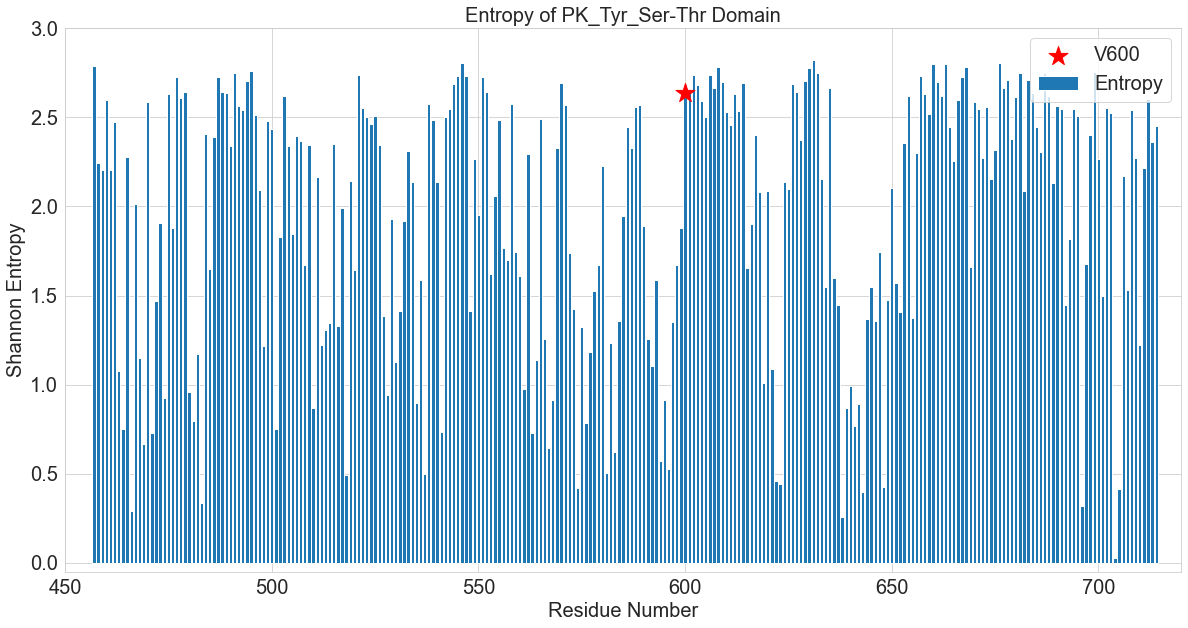

In [12]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15 })

plt.figure(figsize=(20,10))

plt.xlim(450, 720)
plt.ylim(-0.05, 3)
plt.xlabel("Residue Number", fontsize=20)
plt.ylabel("Shannon Entropy", fontsize=20)
plt.title("Entropy of PK_Tyr_Ser-Thr Domain", fontsize=20)

plt.bar(indices, entropy, label = "Entropy")
plt.scatter(indices[143], entropy[143], s = 400, color="red", marker="*", zorder = 4 , label = "V600")

legend(loc='upper right')
plt.show()


### Coevolution Calculation

First, we calculate the mutual information between the columns in the refined MSA.

In [13]:
mutinfo = buildMutinfoMatrix(msa_refined)

@> Mutual information matrix was calculated in 2.88s.


We can visualize mutinfo matrix by function: showMutinfoMatrix(mutinfo)

(<matplotlib.image.AxesImage at 0x1a1ccdaa20>,
 <matplotlib.colorbar.Colorbar at 0x1a1a6efb00>)

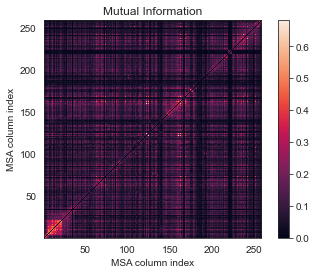

In [17]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

showMutinfoMatrix(mutinfo)

For personalized plotting, we can reset the index to prepared indices.

Text(0.5, 1.0, 'Mutual Information')

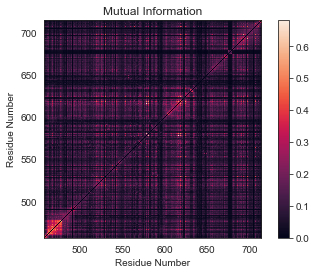

In [18]:
plt.imshow(mutinfo, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower')
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Mutual Information")

In order to have a detailed insight of co-evolution information, the multiple dimensional matrix can be squeezed into a bar plot, in which each column represent the average mutual information at each site. 

In [20]:
MutInfo_mean = []
for i in range(mutinfo.shape[0]):
    MutInfo_mean.append(mean(mutinfo[i]))

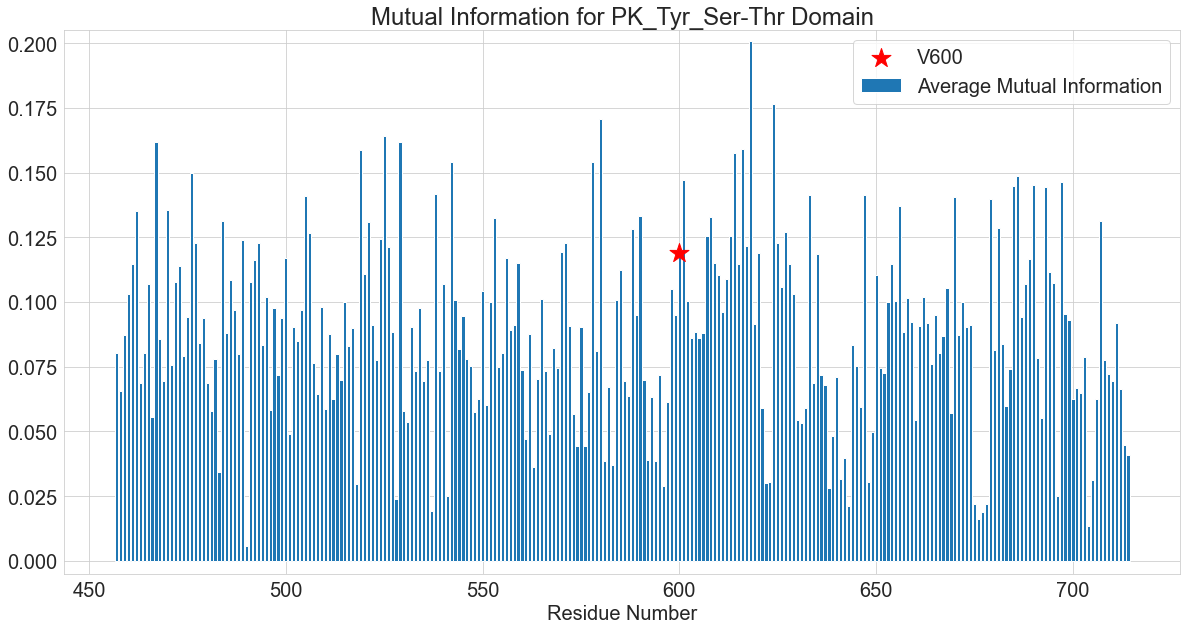

In [21]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(20,10))

bar(indices, MutInfo_mean, label = "Average Mutual Information")
plt.scatter(indices[143], MutInfo_mean[143], s = 400, color="red", marker="*", zorder = 4 , label = "V600")

ylim(-0.005, 0.205)
plt.xlabel("Residue Number")
plt.title("Mutual Information for PK_Tyr_Ser-Thr Domain")
legend()

However, for **contact prediction** we need a more sophisticated analysis, like the Direct Information (DI):

In [19]:
coevol = buildDirectInfoMatrix(msa_refined)

@> DI matrix was calculated in 1732.69s.


Text(0.5, 1.0, 'Mutual Information(DI)')

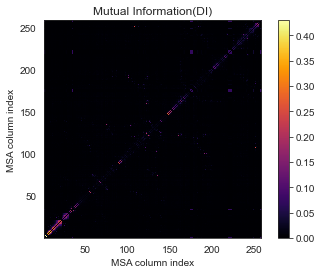

In [23]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

showDirectInfoMatrix(coevol, cmap = 'inferno')
plt.title("Mutual Information(DI)")

Besides DI, several other options can be accessible, such as MIp, SCA and OMES.

ProDy can calculate and plot the mutual information generated in MI, MIp, DI and SCA method with specific functions. However, OMES method temperately do not have the privilege, which means a self-written function is a necessity.

In [ ]:
# Function for Mutual Information Analysis in OMES method
def showOMESMatrix(omesinfo, *args, **kwargs):

    msa = None
    try:
        ndim, shape = omesinfo.ndim, omesinfo.shape
    except AttributeError:
        msa = omesinfo
        omesinfo = buildOMESMatrix(omesinfo)
        ndim, shape = omesinfo.ndim, omesinfo.shape
    
    msa = kwargs.pop('msa', msa)
    if ndim != 2:
        raise ValueError('omesinfo must be a 2D matrix')
    y, x = shape
    if x != y:
        raise ValueError('omesinfo matrix must be a square matrix')

    kwargs.setdefault('interpolation', 'nearest')
    kwargs.setdefault('origin', 'lower')

    if msa is not None:
        indices, msalabel = pickSequence(msa)
        if indices is not None:
            start = indices[0] + 0.5
            end = start + x
            extent = [start, end, start, end]
        else:
            extent = [0.5, x + 0.5, 0.5, y + 0.5]
    else:
        msalabel = None
        extent = [0.5, x + 0.5, 0.5, y + 0.5]

    xlabel = kwargs.pop('xlabel', None)
    if xlabel is None:
        xlabel = msalabel or 'MSA column index'
    title = kwargs.pop('title', None)
    format = kwargs.pop('format', True)

    import matplotlib.pyplot as plt
    show = plt.imshow(omesinfo, extent=extent, *args, **kwargs), plt.colorbar()

    if format:
        plt.xlabel(xlabel)
        plt.ylabel(xlabel)
        if title is None:
            if msa is None:
                title = 'OMES Information'
            else:
                title = 'OMES Information: ' + str(msa)
        plt.title(title)
    return show

def pickSequence(msa, require_match=False):
    """Pick a sequence without gaps and deletions and return its residue
    numbers and labels to be used as indices and X-axis label, or a pair
    of **None** at failure."""

    try:
        counts = calcMSAOccupancy(msa, 'row', count=True)
    except TypeError:
        return None, None
    else:
        length = msa.numResidues()
        split, msa.split = msa.split, True
        rows = (counts == length).nonzero()[0]
        for row in rows:
            try:
                label, (match, indices) = msa[row].getLabel(), msa[row].getResnums(report_match=True)
            except:
                break
            else:
                if require_match and not match:
                    continue
                return (indices, 'Residue number ({0})'.format(label))
        return None, None


## Gaussian Network Model (GNM)

Parse protein structure for elastic network model analysis.

In [25]:
pdb = parsePDB("3TV6", chain = "B", subset = 'calpha')
chain_ca = pdb.select('resid ' + str(ResStart) + ' to ' + str(ResEnd))


@> PDB file is found in working directory (3tv6.pdb.gz).
@> 276 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 172 residues.


In [26]:
print(msa_refined['BRAF_HUMAN'] )
print(chain_ca.getSequence())

iTVGQRIGSGSFGTVYKGKWHGDVAVKMLNVTApTPQQLQAFKNEVGVLRKTRHVNILLFMGYSTKPQLAIVTQWCEGSSLYHHLHIIETKFEMIKLIDIARQTAQGMDYLHAKSIIHRDLKSNNIFLHEDLTVKIGDFGLATVKSRWSGSHQFEQLSGSILWMAPEVIRMQDknpYSFQSDVYAFGIVLYELMTGQLPYSNInNRDQIIFMVGRGYLspdlSKVRSNCPKAMKRLMAECLKKKRDERPLFPQILAsi
ITVGQRIGSGSFGTVYKGKWHGDVAVKMLNVTAPTPQQLQAFKNEVGVLRKTRHVNILLFMGYSTKPQLAIVTQWCEGSSLYHHLHIIETKFEMIKLIDIARQTAQGMDYLHAKSIIHRDLKSNNIFLHEDLTVKIGDFGLATVKSRWSGSHQFEQLSGSILWMAPEVIRMQDKNPYSFQSDVYAFGIVLYELMTGQLPYSNINNRDQIIFMVGRGYLSPDLSKVRSNCPKAMKRLMAECLKKKRDERPLFPQILASI


In [27]:
gnm = GNM("PK_Tyr_Ser-Thr Domain")
gnm.buildKirchhoff(chain_ca)
gnm.calcModes(n_modes = None)  # calculate all modes

@> Kirchhoff was built in 0.02s.
@> 257 modes were calculated in 0.47s.


Show the shape of modes.

([<matplotlib.lines.Line2D at 0x1a1cc12a90>], [], [], [])

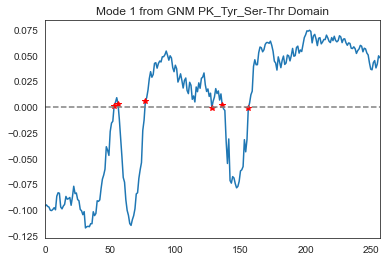

In [29]:
showMode(gnm[0], hinges=True, zero=True)

Plot the contact map.

(457.0, 714.0)

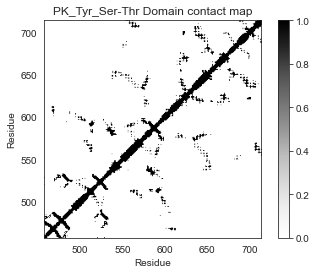

In [28]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

showContactMap(gnm, origin='lower', cmap='Greys', extent = [457,714,457,714])
xlim(457,714)
ylim(457,714)


Plot the cross-correlations map.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n GNM 20 modes')

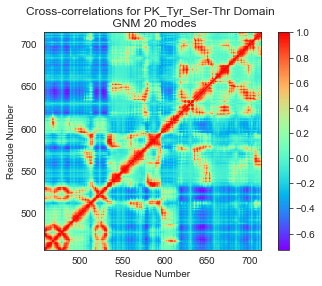

In [37]:
cc_gnm = calcCrossCorr(gnm[:20])
plt.imshow(cc_gnm, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n GNM 20 modes")


Compare mobility and entropy for PK_Tyr_Ser-Thr Domain.

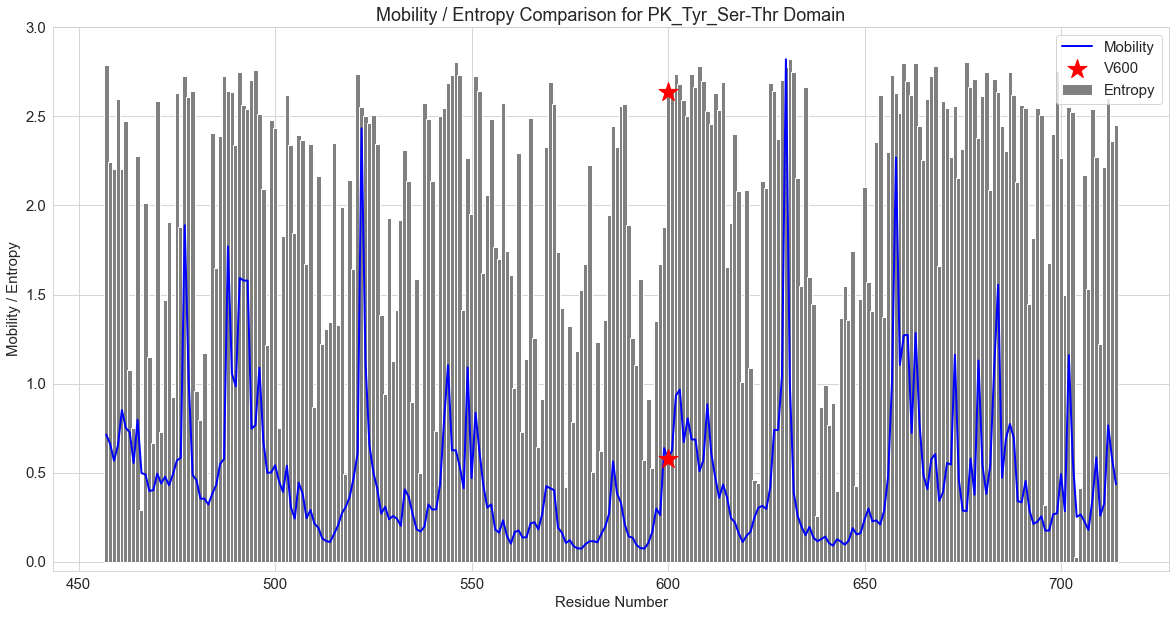

In [58]:
plt.rcParams.update({'font.size': 15})
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

mobility = calcSqFlucts(gnm[:20])

# Plot entropy as grey bars
bar(indices, entropy, width = 1.2, color = 'grey', label = 'Entropy')

# Rescale mobility
mobility = mobility*(max(entropy)/max(mobility))

# Plot mobility as a blue line
plot(indices, mobility, color = 'b', linewidth = 2, label = 'Mobility')

plt.scatter(indices[143], entropy[143], s = 400, color="red", marker="*", zorder = 4 , label = "V600")
plt.scatter(indices[143], mobility[143], s = 400, color="red", marker="*", zorder = 4)

ylim(-0.05, 3)
plt.title("Mobility / Entropy Comparison for PK_Tyr_Ser-Thr Domain")
xlabel('Residue Number')
ylabel('Mobility / Entropy')

legend(loc='upper right')


## Anisotropic Network Model (ANM)

In [35]:
# Wild Type: 3TV6

anm = ANM("PK_Tyr_Ser-Thr Domain")
anm.buildHessian(chain_ca)
anm.calcModes(n_modes = None)  # calculate all modes

@> Hessian was built in 0.12s.
@> 768 modes were calculated in 0.12s.


Plot the cross-correlations map of softest 20 modes.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM 20 modes')

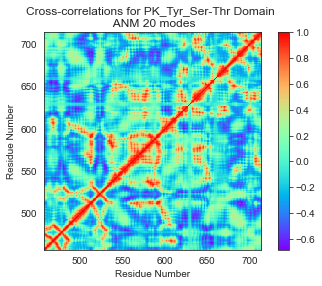

In [38]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

cc_anm = calcCrossCorr(anm[:20])
plt.imshow(cc_anm, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM 20 modes")


Plot the cross-correlations map of mode 1.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM mode 1')

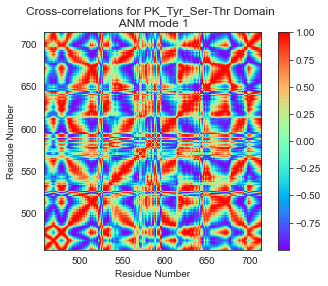

In [54]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

cc_anm = calcCrossCorr(anm[0])
plt.imshow(cc_anm, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM mode 1")


# Analyses of V600E BRAF Mutant

Similar to analyses of wild type BRAF and part of V600E Mutant workflow is skiped.

## Sequence Analysis by Evol 

Same as wild type.

## Gaussian Network Model (GNM)

In [39]:
# Wild Type
pdb_mut = parsePDB("Lab3/model1-mut.pdb", chain = "A", subset = 'calpha')

chain_ca_mut = pdb_mut.select('resid ' + str(ResStart) + ' to ' + str(ResEnd))
chain_ca_mut


@> 766 atoms and 1 coordinate set(s) were parsed in 0.04s.


<Selection: 'resid 457 to 714' from model1-mutA_ca (258 atoms)>

In [40]:
print(msa_refined['BRAF_HUMAN'] )
print(chain_ca_mut.getSequence())

iTVGQRIGSGSFGTVYKGKWHGDVAVKMLNVTApTPQQLQAFKNEVGVLRKTRHVNILLFMGYSTKPQLAIVTQWCEGSSLYHHLHIIETKFEMIKLIDIARQTAQGMDYLHAKSIIHRDLKSNNIFLHEDLTVKIGDFGLATVKSRWSGSHQFEQLSGSILWMAPEVIRMQDknpYSFQSDVYAFGIVLYELMTGQLPYSNInNRDQIIFMVGRGYLspdlSKVRSNCPKAMKRLMAECLKKKRDERPLFPQILAsi
ITVGQRIGSGSFGTVYKGKWHGDVAVKMLNVTAPTPQQLQAFKNEVGVLRKTRHVNILLFMGYSTKPQLAIVTQWCEGSSLYHHLHIIETKFEMIKLIDIARQTAQGMDYLHAKSIIHRDLKSNNIFLHEDLTVKIGDFGLATEKSRWSGSHQFEQLSGSILWMAPEVIRMQDKNPYSFQSDVYAFGIVLYELMTGQLPYSNINNRDQIIFMVGRGYLSPDLSKVRSNCPKAMKRLMAECLKKKRDERPLFPQILASI


In [51]:
gnm_mut = GNM("PK_Tyr_Ser-Thr Domain (V600E)")
gnm_mut.buildKirchhoff(chain_ca_mut)
gnm_mut.calcModes(n_modes = None)  # calculate all modes


@> Kirchhoff was built in 0.01s.
@> 257 modes were calculated in 0.04s.


Plot the contact map.

(457.0, 714.0)

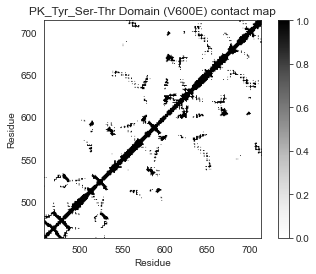

In [64]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

showContactMap(gnm_mut, origin='lower', cmap='Greys', extent = [457,714,457,714])
xlim(457,714)
ylim(457,714)


Plot the cross-correlations map.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n GNM 20 modes (V600E)')

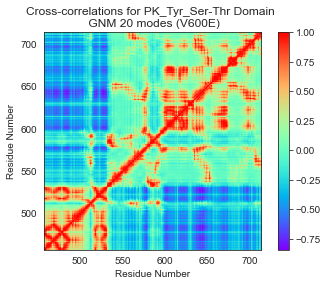

In [65]:
cc_gnm_mut = calcCrossCorr(gnm_mut[:20])
plt.imshow(cc_gnm_mut, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n GNM 20 modes (V600E)")


Compare mobility and entropy for PK_Tyr_Ser-Thr Domain.

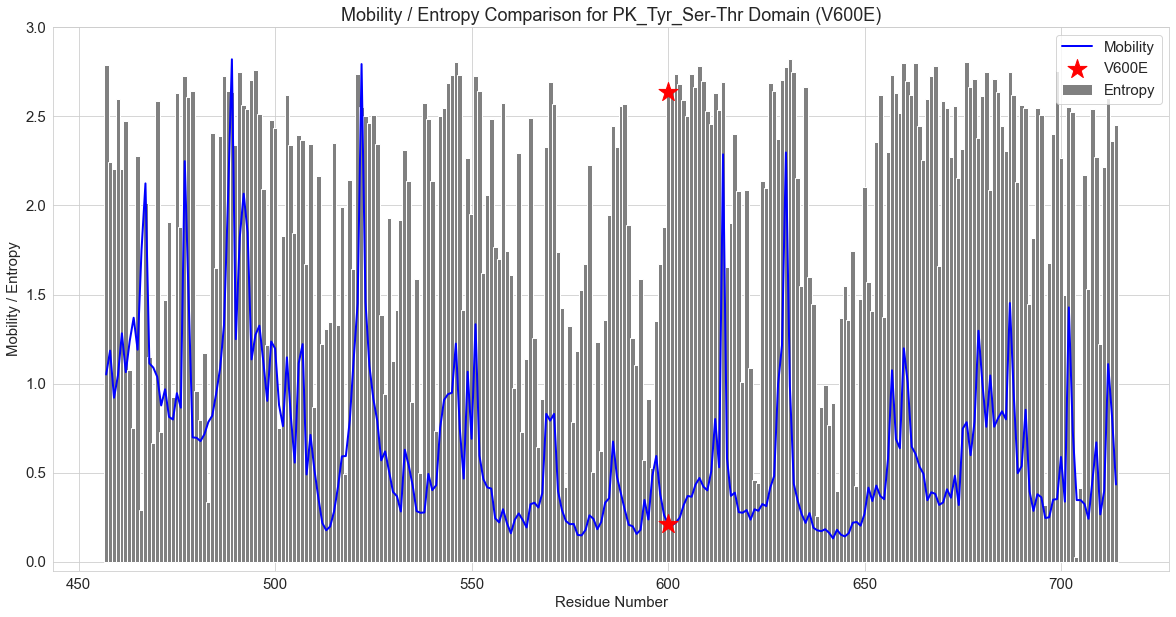

In [57]:
mobility_mut = calcSqFlucts(gnm_mut[:20])

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


# plot entropy as grey bars
bar(indices, entropy, width = 1.2, color = 'grey', label = 'Entropy')

# rescale mobility
mobility_mut = mobility_mut*(max(entropy)/max(mobility_mut))

# plot mobility as a blue line
plot(indices, mobility_mut, color = 'b', linewidth = 2, label = 'Mobility')

plt.scatter(indices[143], entropy[143], s = 400, color="red", marker="*", zorder = 4 , label = "V600E")
plt.scatter(indices[143], mobility_mut[143], s = 400, color="red", marker="*", zorder = 4)

ylim(-0.05, 3)
plt.title("Mobility / Entropy Comparison for PK_Tyr_Ser-Thr Domain (V600E)")
xlabel('Residue Number')
ylabel('Mobility / Entropy')

legend(loc='upper right')

## Anisotropic Network Model (ANM)

In [47]:
# V600E CC Map

anm_mut = ANM("PK_Tyr_Ser-Thr Domain")
anm_mut.buildHessian(chain_ca_mut)
anm_mut.calcModes(n_modes = None)  # calculate all modes


@> Hessian was built in 0.11s.
@> 768 modes were calculated in 0.10s.


Plot the cross-correlations map of 20 softest modes.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM 20 modes (V600E)')

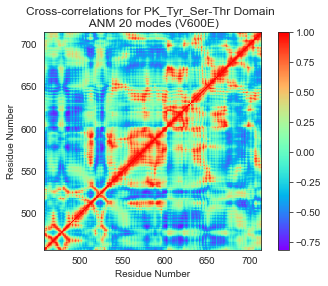

In [49]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

cc_mut = calcCrossCorr(anm_mut[:20])
plt.imshow(cc_mut, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM 20 modes (V600E)")



Plot the cross-correlations map of mode 1.

Text(0.5, 1.0, 'Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM mode 1 (V600E)')

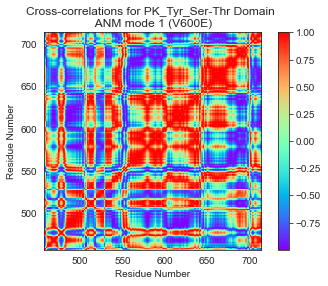

In [55]:
sns.set_style('white')
plt.rcParams.update({'font.size': 10})

cc_mut = calcCrossCorr(anm_mut[0])
plt.imshow(cc_mut, extent = [457,714,457,714], interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for PK_Tyr_Ser-Thr Domain \n ANM mode 1 (V600E)")


# Comparisons of Wild Type BRAF and V600E Mutant 

All modes mobility comparison in the domain (WT v.s. V600E Mutant).

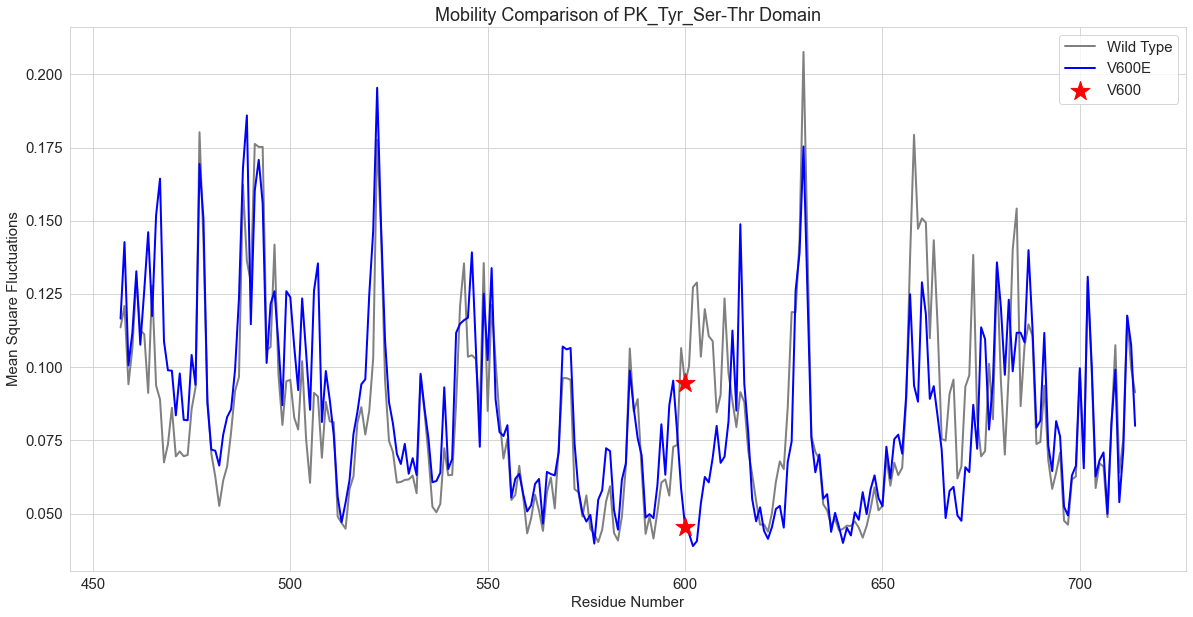

In [61]:
# Calculate MSFs for WT BRAF protein (All modes)
mobility = calcSqFlucts(gnm)

# Calculate MSFs for V600E BRAF mutant (All modes)
mobility_mut = calcSqFlucts(gnm_mut)

# Set plotting background
sns.set_style('whitegrid')

# Set figure size
plt.figure(figsize=(20,10))

# Plot MSF for Wild Type BRAF protein
plot(indices, mobility, color = 'grey', linewidth = 2, label = 'Wild Type')


# Plot MSF for V600E mutant BRAF protein
plot(indices, mobility_mut, color = 'b', linewidth = 2, label = 'V600E')

# Label residue V600 on the line with red stars
plt.scatter(indices[143], mobility[143], s = 400, color="red", marker="*", zorder = 5)
plt.scatter(indices[143], mobility_mut[143], s = 400, color="red", marker="*", zorder = 5, label = "V600")

# Set the plotting title and labels of x, y axis
plt.title("Mobility Comparison of PK_Tyr_Ser-Thr Domain")
xlabel('Residue Number')
ylabel('Mean Square Fluctuations')

# Set the plotting font size and legend
plt.rcParams.update({'font.size': 15})
legend(loc='upper right')

20 modes mobility comparison in the domain (WT v.s. V600E Mutant) and label PTM sites on the lines.

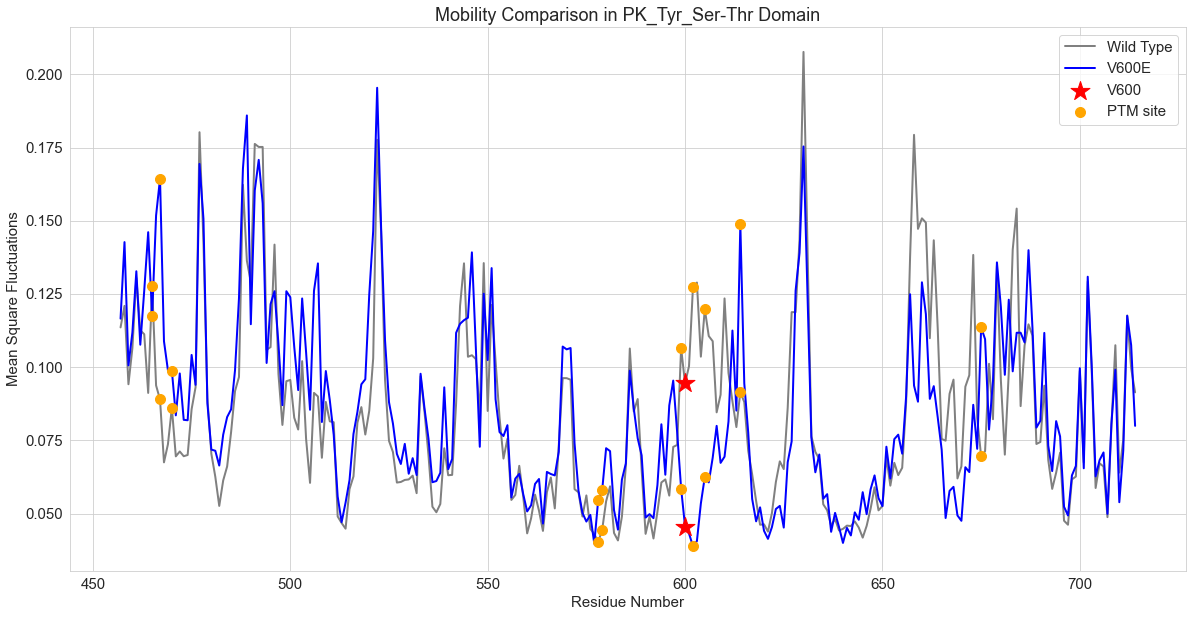

In [62]:
# Calculate MSFs for WT BRAF protein (20 modes)
mobility = calcSqFlucts(gnm[:20])

# Calculate MSFs for V600E BRAF mutant (20 modes)
mobility_mut = calcSqFlucts(gnm_mut[:20])

# Set plotting background
sns.set_style('whitegrid')

# Set figure size
plt.figure(figsize=(20,10))

# Plot MSF for Wild Type BRAF protein
plot(indices, mobility, color = 'grey', linewidth = 2, label = 'Wild Type')


# Plot MSF for V600E mutant BRAF protein
plot(indices, mobility_mut, color = 'b', linewidth = 2, label = 'V600E')

# Label residue V600 on the line with red stars
plt.scatter(indices[143], mobility[143], s = 400, color="red", marker="*", zorder = 5)
plt.scatter(indices[143], mobility_mut[143], s = 400, color="red", marker="*", zorder = 5, label = "V600")

# Label PTM sites collected from databases with orange dots
plt.scatter(indices[8], mobility[8], s = 100, color="orange", marker="o", zorder = 4, label = "PTM site")
plt.scatter(indices[8], mobility_mut[8], s = 100, color="orange", marker="o", zorder = 4)
for i in [10,13,121,122,142,145,148,157,218]:
    plt.scatter(indices[i], mobility[i], s = 100, color="orange", marker="o", zorder = 4)
    plt.scatter(indices[i], mobility_mut[i], s = 100, color="orange", marker="o", zorder = 4)

# Set the plotting title and labels of x, y axis
plt.title("Mobility Comparison in PK_Tyr_Ser-Thr Domain")
xlabel('Residue Number')
ylabel('Mean Square Fluctuations')

# Set the plotting font size and legend
plt.rcParams.update({'font.size': 15})
legend(loc='upper right')

Plot the overlap map.

In [14]:
mut = parsePDB('Lab3/model1-mut.pdb')
mut = mut.select('calpha and chain A')

mut_anm=ANM('V600E')
mut_anm.buildHessian(mut)
mut_anm.calcModes(20)

mut_chain, sel_mut_chain = sliceModel(mut_anm, mut, "resnum 457 to 714")
pro_mut_chain = mut.select("resnum 457 to 714")

pro_mut_chain

@> 11810 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> Hessian was built in 0.33s.
@> 20 modes were calculated in 0.69s.


<Selection: '(resnum 457 to ...ha and chain A)' from model1-mut (258 atoms)>

In [15]:
wt = parsePDB('Lab2/3tv6.pdb')
wt = wt.select('calpha and chain B')

wt_anm=ANM('WT')
wt_anm.buildHessian(wt)
wt_anm.calcModes(20)

wt_chain, sel_wt_chain = sliceModel(wt_anm, wt, "resnum 457 to 714")
pro_wt_chain = wt.select("resnum 457 to 714")

pro_wt_chain

@> 4414 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 329 residues.
@> Hessian was built in 0.12s.
@> 20 modes were calculated in 0.05s.


<Selection: '(resnum 457 to ...ha and chain B)' from 3tv6 (258 atoms)>

Text(0, 0.5, 'Wild Type')

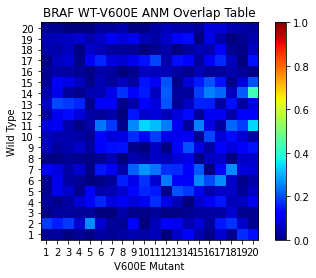

In [16]:
showOverlapTable(mut_chain, wt_chain)
title('BRAF WT-V600E ANM Overlap Table')
xlabel('V600E Mutant')
ylabel("Wild Type")

Plot the cumulative overlap map.

In [7]:
wt_aa = parsePDB('Lab2/3tv6.pdb')
wt_ca = wt_aa.select('calpha and chain B and resnum 457 to 714')

mut_aa = parsePDB('Lab3/model1-mut.pdb')
mut_ca = mut_aa.select('calpha and chain A and resnum 457 to 714')

anm_wt = ANM('BRAF (WT)')
anm_wt.buildHessian(wt_ca)
anm_wt.calcModes()

calcRMSD(wt_ca, mut_ca)

@> 4414 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 329 residues.
@> 11810 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> Hessian was built in 0.11s.
@> 20 modes were calculated in 0.04s.


177.1605548905181

In [8]:
aligned_mut_ca, T = superpose(mut_ca, wt_ca)

In [9]:
calcRMSD(aligned_mut_ca, wt_ca)

5.697815606244779

Text(0.5, 1.0, 'Cumulative Overlap with Mutant')

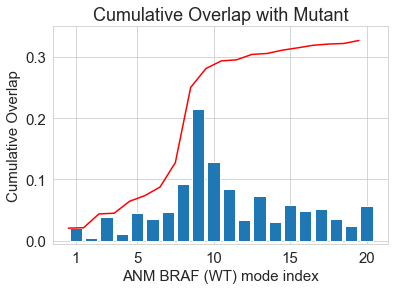

In [23]:
defvec = calcDeformVector(wt_ca, aligned_mut_ca)

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15 })

showOverlap(defvec.getNormed(), anm_wt)
ylim(-0.005, 0.35)

showCumulOverlap(defvec.getNormed(), anm_wt, 'r')
plt.xticks([1, 5, 10, 15, 20])
plt.ylabel("Cumulative Overlap")

plt.title("Cumulative Overlap with Mutant")


# Analyses of Full Length HUMAN_BRAF Protein

In [3]:
pdb = parsePDB("Lab3/model1.pdb")
chain_ca = pdb.select('calpha and chain A')
chain_ca

@> 11811 atoms and 1 coordinate set(s) were parsed in 0.13s.


<Selection: 'calpha and chain A' from model1 (766 atoms)>

In [4]:
gnm = GNM("BRAF")
gnm.buildKirchhoff(chain_ca)
gnm.calcModes(n_modes = None)  # calculate all modes

@> Kirchhoff was built in 0.03s.
@> 765 modes were calculated in 0.57s.


Mode shape of GNM mode 1 to 3.

Text(0.5, 1.0, 'GNM Mode 3')

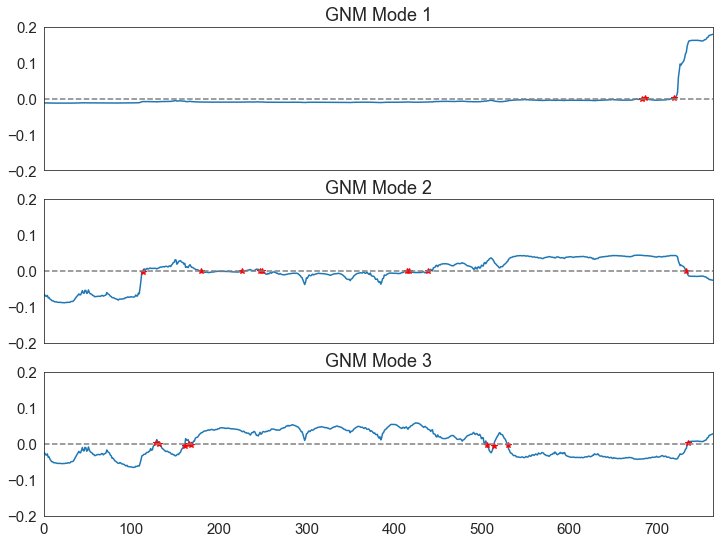

In [5]:
figure(figsize=(12,9))
sns.set_style('white')
rcParams.update({'font.size': 15})

plt.subplot(3,1,1)
showMode(gnm[0], hinges=True, zero=True)
plt.xticks([])
ylim(-0.2, 0.2)
#xlabel("Residue Number")
#ylabel("Mode Shape")
title("GNM Mode 1")

# Mode1:[683, 687, 720]

plt.subplot(3,1,2)
#figure(figsize=(12,5))
showMode(gnm[1], hinges=True, zero=True)
plt.xticks([])
ylim(-0.2,0.2)
#xlabel("Residue Number")
#ylabel("Mode Shape")
title("GNM Mode 2")

# Mode2:[113, 179, 226, 247, 249, 415, 417, 439, 734]

plt.subplot(3,1,3)
#figure(figsize=(12,5))
showMode(gnm[2], hinges=True, zero=True)
ylim(-0.2, 0.2)
#xlabel("Residue Number")
#ylabel("Mode Shape")
title("GNM Mode 3")

# Mode3:[128, 132, 161, 166, 168, 506, 514, 530, 736]



Plot the contact map.

(<matplotlib.image.AxesImage at 0x1a24dfc6a0>,
 [],
 [])

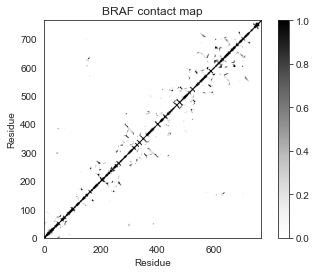

In [7]:
rcParams.update({'font.size': 10})

showContactMap(gnm)

Plot the cross-correlations map (ANM).

Text(0.5, 1.0, 'Cross-correlations for BRAF (GNM 20 modes)')

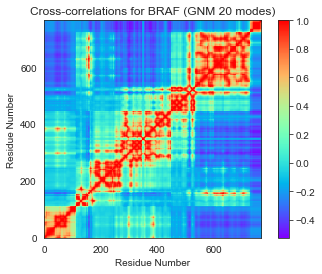

In [8]:
plt.rcParams.update({'font.size': 10})

cc = calcCrossCorr(gnm[:20])
plt.imshow(cc, interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.yticks([0,200,400,600])
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for BRAF (GNM 20 modes)")



Plot the cross-correlations map (GNM).

In [5]:
anm = ANM("BRAF")
anm.buildHessian(chain_ca)
anm.calcModes(n_modes = None)  # calculate all modes

@> Hessian was built in 0.35s.
@> 2292 modes were calculated in 1.96s.


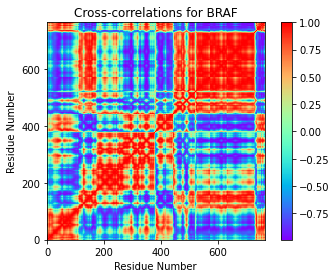

In [6]:
cc = calcCrossCorr(anm[:20])
plt.imshow(cc, interpolation = 'nearest', origin = 'lower',cmap = "rainbow")
plt.colorbar()
plt.yticks([0,200,400,600])
plt.xlabel("Residue Number")
plt.ylabel("Residue Number")
plt.title("Cross-correlations for BRAF")
plt.rcParams.update({'font.size': 10})